In [97]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Import thư viện

In [98]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

import seaborn as sns
import matplotlib.pyplot as plt
import math 

#### Đọc bộ dữ liệu

In [99]:
!gdown --id "10F0NXn6rKs4nLzuPNeK1LONapSVbfNxL"
!gdown --id "10Rd4vomP64bONc0EQT4v_U32FfKrH1wX"
!gdown --id "10IVFQ91bQ2nx6-Z0C3YrelcrmtwBaZHS"
!gdown --id "10O2dD93gBST6-Tugqcd0z8tPREu1eVdl"
!gdown --id "10Wrcgqnk7SA60GlfYvl6b_noogeoI3SG"

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=10F0NXn6rKs4nLzuPNeK1LONapSVbfNxL
To: /content/Manhattan_final.csv
100% 10.2M/10.2M [00:00<00:00, 176MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=10Rd4vomP64bONc0EQT4v_U32FfKrH1wX
To: /content/Bronx_final.csv
100% 622k/622k [00:00<00:00, 31.0MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.

In [100]:
df_manhattan = pd.read_csv('/content/Manhattan_final.csv')
df_bronx = pd.read_csv('/content/Bronx_final.csv')
df_queens = pd.read_csv('/content/Queens_final.csv')
df_staten_island = pd.read_csv('/content/Staten_Island_final.csv')
df_moderate= pd.read_csv('/content/moderate_final.csv')

#### Chọn thuộc tính của bộ dữ liệu

In [101]:
target = ['host_identity_verified','instant_bookable','cancellation_policy','room type','Construction year','minimum nights','review rate number','price', 'service fee']

##### Manhattan

In [102]:
df_manhattan_cp = df_manhattan.copy()

In [103]:
df_manhattan_cp = df_manhattan_cp[target]

##### staten_island

In [104]:
df_staten_island_cp = df_staten_island.copy()

In [105]:
df_staten_island_cp = df_staten_island_cp[target]

#### Encoding

##### Khu vực Manhattan

In [106]:
df_manhattan_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43784 entries, 0 to 43783
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_identity_verified  43784 non-null  object 
 1   instant_bookable        43784 non-null  bool   
 2   cancellation_policy     43784 non-null  object 
 3   room type               43784 non-null  object 
 4   Construction year       43784 non-null  float64
 5   minimum nights          43784 non-null  float64
 6   review rate number      43784 non-null  float64
 7   price                   43784 non-null  float64
 8   service fee             43784 non-null  float64
dtypes: bool(1), float64(5), object(3)
memory usage: 2.7+ MB


In [107]:
df_manhattan_cp

,host_identity_verified,instant_bookable,cancellation_policy,room type,Construction year,minimum nights,review rate number,price,service fee
0,verified,False,moderate,Entire home/apt,2007.0,30.0,4.0,142.0,28.0
1,unconfirmed,True,flexible,Private room,2005.0,3.0,5.0,620.0,124.0
2,verified,False,moderate,Entire home/apt,2009.0,10.0,3.0,204.0,41.0
3,verified,True,flexible,Entire home/apt,2013.0,3.0,3.0,577.0,115.0
4,verified,True,strict,Private room,2005.0,2.0,3.0,1018.0,204.0
...,...,...,...,...,...,...,...,...,...
43779,verified,True,moderate,Private room,2011.0,5.0,2.0,247.0,49.0
43780,unconfirmed,False,strict,Entire home/apt,2010.0,2.0,2.0,566.0,113.0
43781,verified,False,flexible,Private room,2011.0,5.0,5.0,643.0,129.0
43782,unconfirmed,True,strict,Private room,2005.0,1.0,2.0,388.0,78.0


In [108]:
df_manhattan_cp['host_identity_verified'] = LabelEncoder().fit_transform(df_manhattan_cp['host_identity_verified'])
df_manhattan_cp['instant_bookable'] = LabelEncoder().fit_transform(df_manhattan_cp['instant_bookable'])
df_manhattan_cp['cancellation_policy'] = LabelEncoder().fit_transform(df_manhattan_cp['cancellation_policy'])
df_manhattan_cp['room type'] = LabelEncoder().fit_transform(df_manhattan_cp['room type'])

In [109]:
df_staten_island_cp

,host_identity_verified,instant_bookable,cancellation_policy,room type,Construction year,minimum nights,review rate number,price,service fee
0,unconfirmed,True,strict,Private room,2003.0,131.0,4.0,1015.0,203.0
1,unconfirmed,True,flexible,Private room,2006.0,2.0,5.0,725.0,145.0
2,unconfirmed,True,strict,Private room,2017.0,2.0,5.0,784.0,157.0
3,unconfirmed,True,flexible,Private room,2022.0,2.0,5.0,593.0,119.0
4,verified,False,moderate,Private room,2010.0,2.0,5.0,1032.0,206.0
...,...,...,...,...,...,...,...,...,...
950,unconfirmed,True,moderate,Entire home/apt,2014.0,3.0,2.0,723.0,145.0
951,verified,True,moderate,Entire home/apt,2019.0,30.0,3.0,982.0,196.0
952,verified,True,moderate,Entire home/apt,2021.0,6.0,4.0,333.0,67.0
953,unconfirmed,False,flexible,Entire home/apt,2021.0,4.0,4.0,133.0,27.0


##### Khu vực staten_island

In [110]:
df_staten_island_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 0 to 954
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_identity_verified  955 non-null    object 
 1   instant_bookable        955 non-null    bool   
 2   cancellation_policy     955 non-null    object 
 3   room type               955 non-null    object 
 4   Construction year       955 non-null    float64
 5   minimum nights          955 non-null    float64
 6   review rate number      955 non-null    float64
 7   price                   955 non-null    float64
 8   service fee             955 non-null    float64
dtypes: bool(1), float64(5), object(3)
memory usage: 60.7+ KB


In [111]:
df_staten_island_cp['host_identity_verified'] = LabelEncoder().fit_transform(df_staten_island_cp['host_identity_verified'])
df_staten_island_cp['instant_bookable'] = LabelEncoder().fit_transform(df_staten_island_cp['instant_bookable'])
df_staten_island_cp['cancellation_policy'] = LabelEncoder().fit_transform(df_staten_island_cp['cancellation_policy'])
df_staten_island_cp['room type'] = LabelEncoder().fit_transform(df_staten_island_cp['room type'])

In [112]:
df_staten_island_cp.shape

(955, 9)

#### Split data

##### Manhattan

In [113]:
x_manhattan = df_manhattan_cp.drop(["price"],axis=1).values
y_manhattan = df_manhattan_cp['price'].values

In [114]:
x_train_manhattan,x_test_manhattan,y_train_manhattan,y_test_manhattan = train_test_split(x_manhattan, y_manhattan, test_size=0.2, random_state=0)

##### staten_island

In [115]:
x_staten_island = df_staten_island_cp.drop(["price"],axis=1).values
y_staten_island = df_staten_island_cp['price'].values

In [116]:
x_train_staten_island,x_test_staten_island,y_train_staten_island,y_test_staten_island = train_test_split(x_staten_island, y_staten_island, test_size=0.2, random_state=0)

#### Phát triển model

##### Linear Regression

###### Manhattan

In [117]:
reg = LinearRegression()
reg.fit(x_train_manhattan, y_train_manhattan)

LinearRegression()

In [118]:
scores = cross_val_score(reg, x_test_manhattan, y_test_manhattan, cv =4)
print(np.mean(scores))

0.9999548560351972


In [119]:
y_pred_reg_manhattan = reg.predict(x_test_manhattan)
rmse = mean_squared_error(y_test_manhattan, y_pred_reg_manhattan, squared=False)
print(rmse)

2.2325040535519993


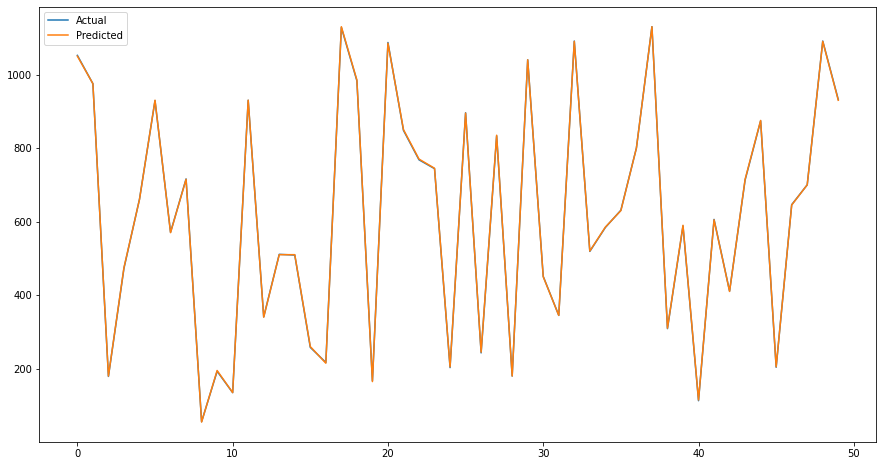

In [120]:
df = pd.DataFrame({"Y_test_manhattan": y_test_manhattan , "Y_pred_manhattan" : y_pred_reg_manhattan})
plt.figure(figsize=(15,8))
plt.plot(df[:50])
plt.legend(['Actual' , 'Predicted'])

###### Staten Island

In [121]:
reg = LinearRegression()
reg.fit(x_train_staten_island, y_train_staten_island)

LinearRegression()

In [122]:
scores = cross_val_score(reg, x_test_staten_island, y_test_staten_island, cv =4)
np.mean(scores)

0.9999336486186858

In [123]:
y_pred_reg_staten_island = reg.predict(x_test_staten_island)
rmse = mean_squared_error(y_test_staten_island, y_pred_reg_staten_island, squared=False)
print(rmse)

2.4816587348543457


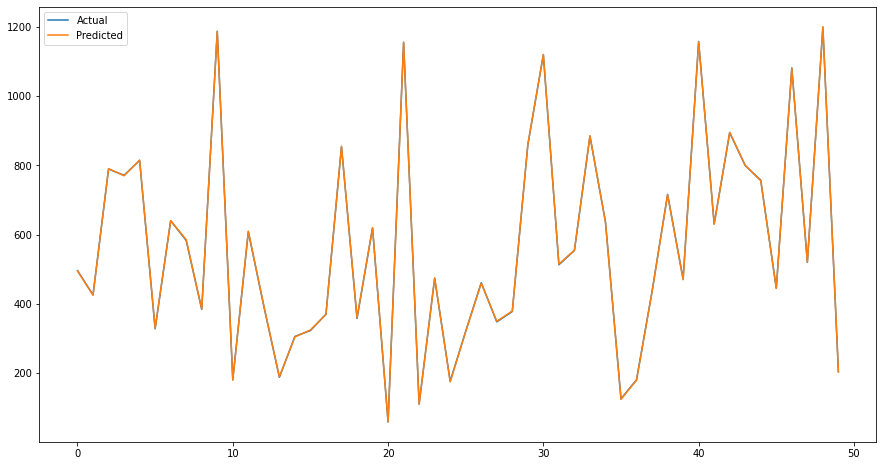

In [124]:
df = pd.DataFrame({"Y_test_staten_island": y_test_staten_island , "Y_pred_staten_island" : y_pred_reg_staten_island})
plt.figure(figsize=(15,8))
plt.plot(df[:50])
plt.legend(['Actual' , 'Predicted'])

##### Decision Tree

###### Manhattan

In [125]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train_manhattan, y_train_manhattan)

DecisionTreeRegressor()

In [126]:
scores = cross_val_score(dtr, x_test_manhattan, y_test_manhattan, cv =4)
print(np.mean(scores))

0.9999093347081065


In [127]:
y_pred_dtr_manhattan = dtr.predict(x_test_manhattan)
rmse = mean_squared_error(y_test_manhattan, y_pred_dtr_manhattan, squared=False)
print(rmse)

2.9907618112345062


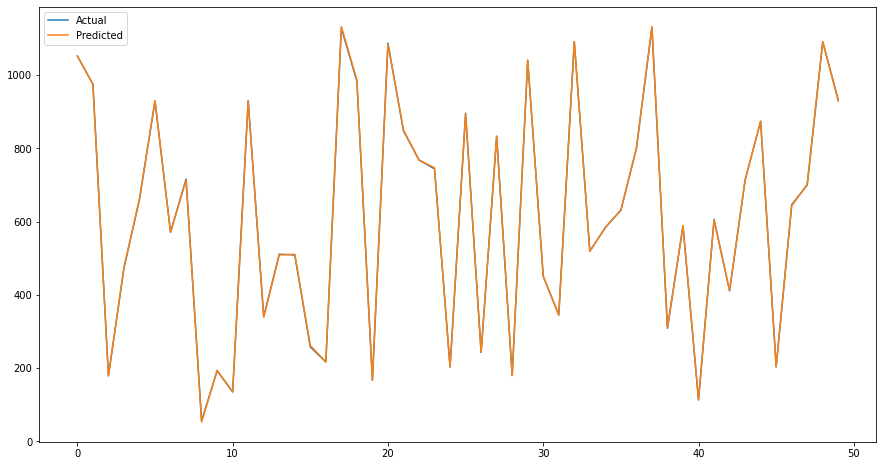

In [128]:
df = pd.DataFrame({"Y_test_manhattan": y_test_manhattan , "Y_pred_manhattan" : y_pred_dtr_manhattan})
plt.figure(figsize=(15,8))
plt.plot(df[:50])
plt.legend(['Actual' , 'Predicted'])

###### Staten Island

In [129]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train_staten_island, y_train_staten_island)

DecisionTreeRegressor()

In [130]:
scores = cross_val_score(dtr, x_test_staten_island, y_test_staten_island, cv =4)
print(np.mean(scores))

0.9985150342109153


In [131]:
y_pred_dtr_staten_island = dtr.predict(x_test_staten_island)
rmse = mean_squared_error(y_test_staten_island, y_pred_dtr_staten_island, squared=False)
print(rmse)

3.6372739090200406


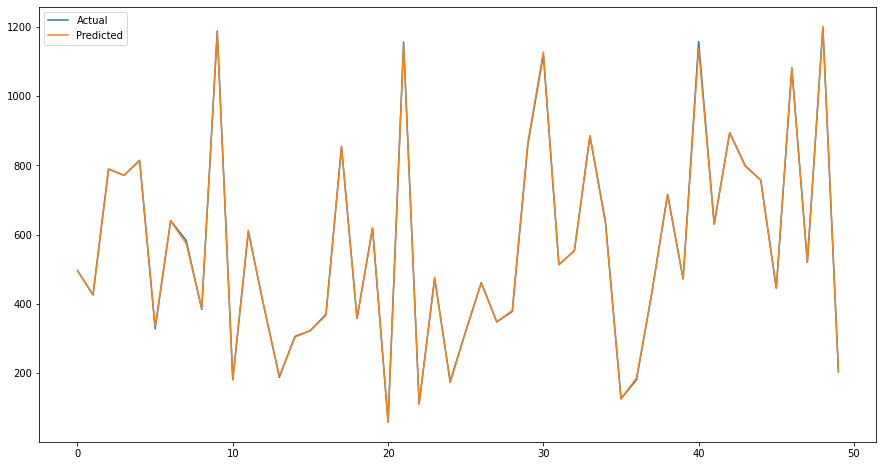

In [132]:
df = pd.DataFrame({"Y_test_staten_island": y_test_staten_island , "Y_pred_staten_island" : y_pred_dtr_staten_island})
plt.figure(figsize=(15,8))
plt.plot(df[:50])
plt.legend(['Actual' , 'Predicted'])

#####  Random Forest

###### Manhattan

In [133]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf.fit(x_train_manhattan, y_train_manhattan)

RandomForestRegressor(random_state=0)

In [134]:
scores = cross_val_score(rf, x_test_manhattan, y_test_manhattan, cv =4)
print(np.mean(scores))

0.9999492296204477


In [135]:
y_pred_rf_manhattan = rf.predict(x_test_manhattan)
rmse = mean_squared_error(y_test_manhattan, y_pred_rf_manhattan, squared=False)
print(rmse)

2.3974038064256176


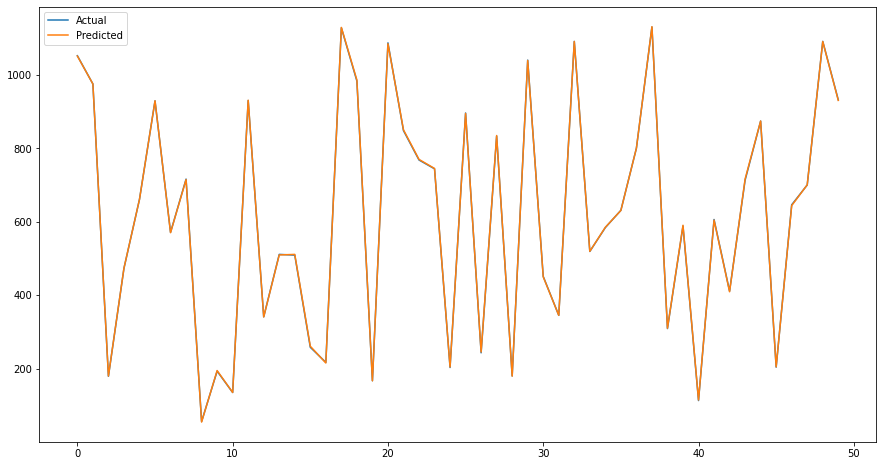

In [136]:
df = pd.DataFrame({"Y_test_manhattan": y_test_manhattan , "Y_pred_manhattan" : y_pred_rf_manhattan})
plt.figure(figsize=(15,8))
plt.plot(df[:50])
plt.legend(['Actual' , 'Predicted'])

###### Staten Island

In [137]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf.fit(x_train_staten_island, y_train_staten_island)

RandomForestRegressor(random_state=0)

In [138]:
scores = cross_val_score(rf, x_test_staten_island, y_test_staten_island, cv = 4)
print(np.mean(scores))

0.9994521021756952


In [139]:
y_pred_rf_staten_island = rf.predict(x_test_staten_island)
rmse = mean_squared_error(y_test_staten_island, y_pred_rf_staten_island, squared=False)
print(rmse)

2.7156124139894047


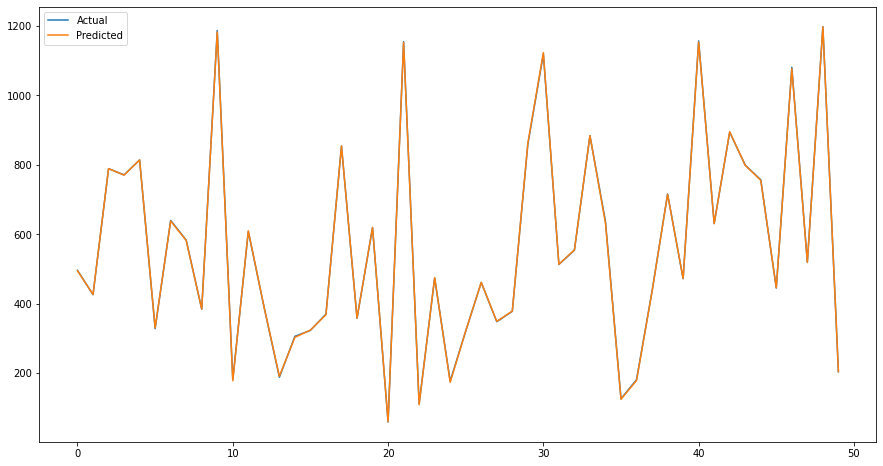

In [140]:
df = pd.DataFrame({"Y_test_staten_island": y_test_staten_island , "Y_pred_staten_island" : y_pred_rf_staten_island})
plt.figure(figsize=(15,8))
plt.plot(df[:50])
plt.legend(['Actual' , 'Predicted'])

#### Kết quả dự đoán của các mô hình

In [141]:
y_report_mht = pd.DataFrame({"Y_test manhattan": y_test_manhattan, "Y_pred Linear Regression" : y_pred_reg_manhattan, "Y_pred Decision Tree" : y_pred_dtr_manhattan, "Y_pred Random Forest" : y_pred_rf_manhattan})

In [142]:
y_report_mht.head(10)

,Y_test manhattan,Y_pred Linear Regression,Y_pred Decision Tree,Y_pred Random Forest
0,1052.0,1049.938505,1052.0,1051.02
1,975.0,974.975357,975.0,975.02
2,179.0,180.007764,179.0,179.75
3,473.0,474.991196,475.0,473.63
4,661.0,660.074106,662.0,660.70
5,929.0,930.060308,930.0,929.28
6,571.0,569.946086,571.0,570.11
7,716.0,715.102100,713.0,714.74
8,56.0,55.006518,53.0,54.52
9,193.0,195.086982,194.0,194.66


In [143]:
y_report_si = pd.DataFrame({"Y_test staten_island": y_test_staten_island, "Y_pred Linear Regression" : y_pred_reg_staten_island, "Y_pred Decision Tree" : y_pred_dtr_staten_island, "Y_pred Random Forest" : y_pred_rf_staten_island})

In [144]:
y_report_si.head(10)

,Y_test staten_island,Y_pred Linear Regression,Y_pred Decision Tree,Y_pred Random Forest
0,496.0,494.945668,496.0,494.79
1,426.0,425.008745,426.0,426.41
2,789.0,790.116173,789.0,789.10
3,771.0,769.755301,771.0,770.39
4,814.0,814.990773,814.0,814.10
5,328.0,329.805969,335.0,330.06
6,640.0,640.206075,640.0,638.03
7,583.0,585.310905,574.0,582.16
8,384.0,384.928083,387.0,384.57
9,1187.0,1185.346264,1183.0,1182.90
